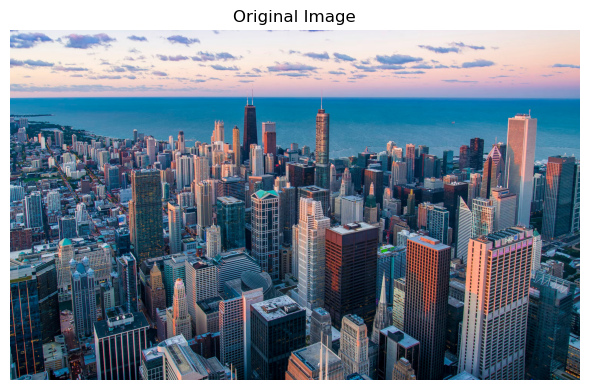

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the provided image
image_path =  "/mnt/c/Users/rick/Pictures/rust-cartoon-car6.jpg"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply median blur
gray_blur = cv2.medianBlur(gray, 5)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')


plt.show()


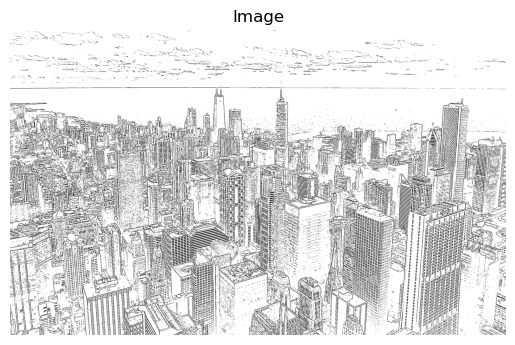

In [30]:

img

th3 = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,5,5)

plt.title('Image')
plt.imshow(th3, cmap='gray')
plt.axis('off')

plt.show()

import numpy as np

np.shape(th3)
th3 = cv2.bitwise_not(th3)


In [31]:
# Reshape the image to a 2D array of pixels
pixels = img_rgb.reshape((-1, 3))

# Convert to float type
pixels = np.float32(pixels)

# Define criteria and apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 8  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)

# Map the labels to the centers
quantized_img = centers[labels.flatten()]
quantized_img = quantized_img.reshape(img_rgb.shape)


In [ ]:
# #--(loadImage)
# image_path = "Path/To/Image.png"
# #--(medianBlur)
# blurFactor = 5
# #--(adaptive_threshold)
# max_value = 255
# block_size = 5
# c = 5
# #--(contours)
# min_area = 5
# minLenght = 50
# #--(dilation)
# kernelX = 3
# kernelY = 3
# iterations = 1
# #--(quantizing)
# k = 8  # Number of clusters
# attempts = 10
# max_count = 100
# epsilon=0.2


# img = cv2.imread(image_path)

# gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# gray_blur = cv2.medianBlur(gray, 5)

# th3 = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,5,5)

# [
#     contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_area and cv2.arcLength(contour,False) >= minLenght]
    
#     contour_image = np.zeros_like(th3) # Create a white image
#     cv2.drawContours(contour_image, filtered_contours, -1, (255), 1)    
# ]


# [
#     kernel = np.ones((3, 3), np.uint8)  # Adjust the kernel size as needed
#     dilated_image = cv2.dilate(contour_image, kernel, iterations=1)
#     dilated_image_inverted = cv2.cvtColor(cv2.bitwise_not(dilated_image), cv2.COLOR_GRAY2BGR)
# ]

# [
#     pixels = img_rgb.reshape((-1, 3))
#     pixels = np.float32(pixels)
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
#     _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     centers = np.uint8(centers)
#     quantized_img = centers[labels.flatten()]
#     quantized_img = quantized_img.reshape(img_rgb.shape)
# ]

# cartoon = cv2.bitwise_and(quantized_img, dilated_image_inverted)



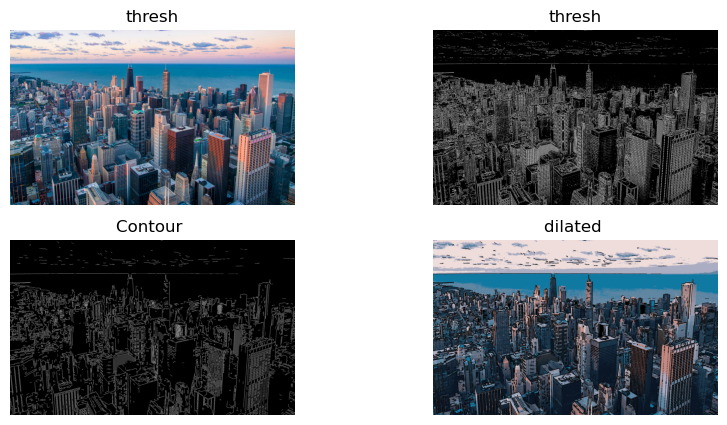

In [32]:

min_area = 5
minLenght = 50

# Find contours
contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image

filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_area and cv2.arcLength(contour,False) >= minLenght]


# Draw contours on a blank three-channel image
contour_image = np.zeros_like(th3) # Create a white image
cv2.drawContours(contour_image, filtered_contours, -1, (255), 1)

# Display the original, binary, and contour images
plt.figure(figsize=(10, 5))

kernel = np.ones((3, 3), np.uint8)  # Adjust the kernel size as needed
dilated_image = cv2.dilate(contour_image, kernel, iterations=1)

dilated_image_inverted = cv2.cvtColor(cv2.bitwise_not(dilated_image), cv2.COLOR_GRAY2BGR)

cartoon = cv2.bitwise_and(quantized_img, dilated_image_inverted)

plt.subplot(2, 2, 1)
plt.title('thresh')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('thresh')
plt.imshow(th3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Contour ')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('dilated ')
plt.imshow(cartoon)
plt.axis('off')


plt.show()


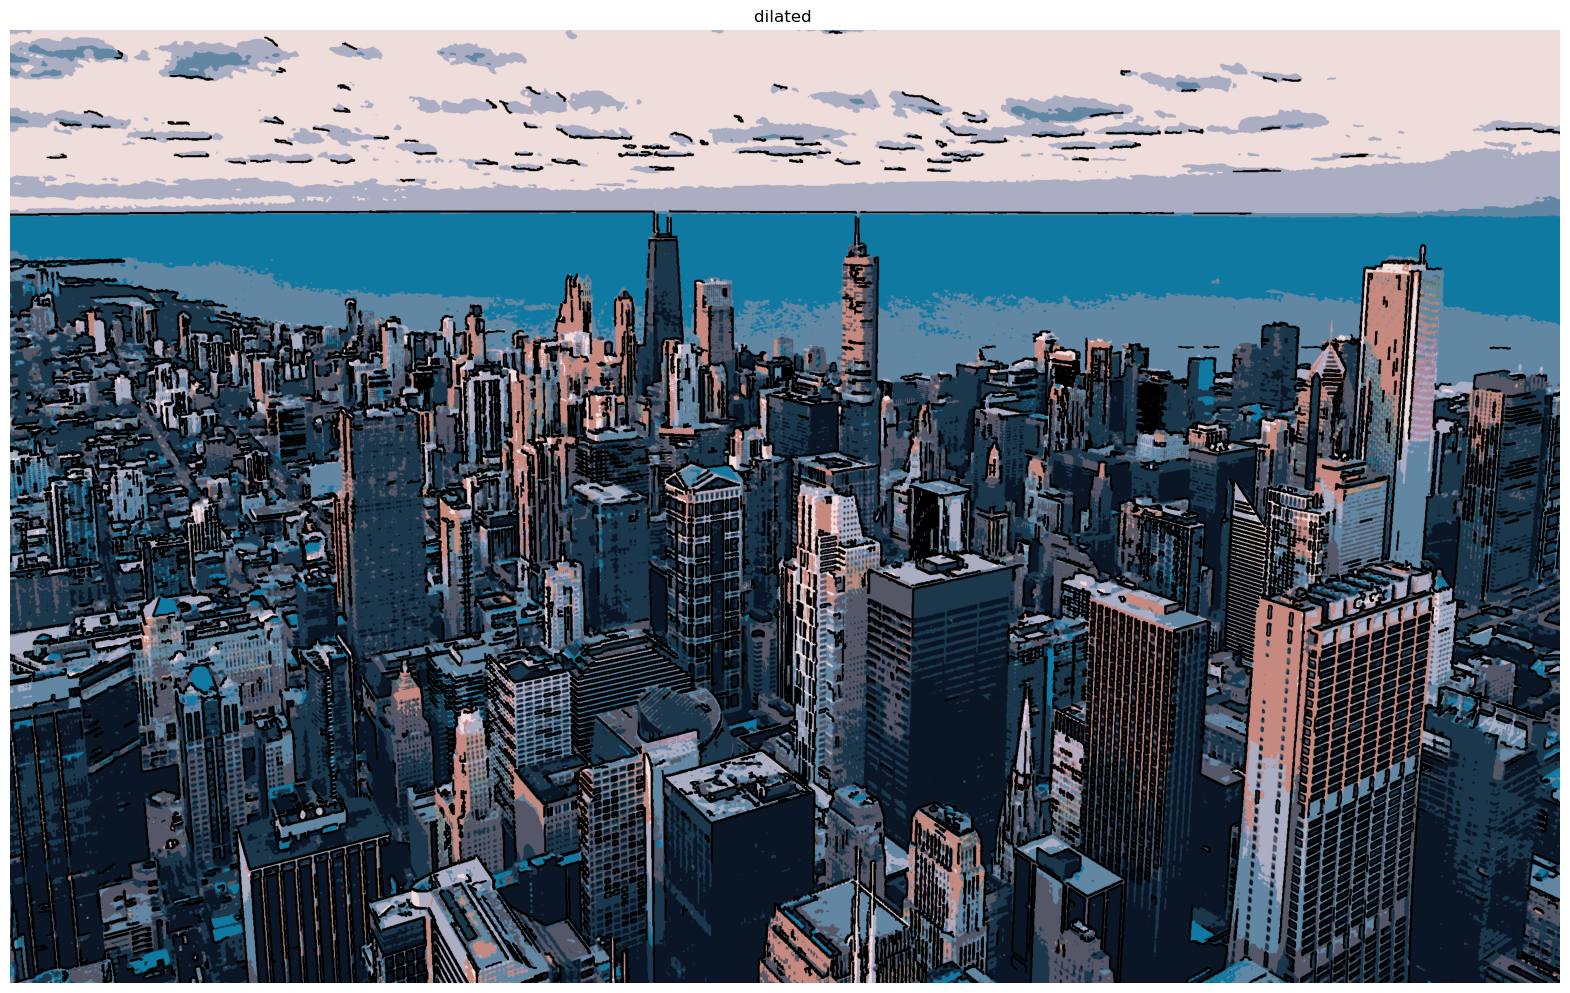

In [33]:
plt.figure(figsize=(20,20))
cartoon_b = cv2.medianBlur(quantized_img, 5)
cartoon_c = cv2.bitwise_and(cartoon_b, dilated_image_inverted)

plt.title('dilated ')
plt.imshow(cartoon_c)
plt.axis('off')
plt.show()
